**Name : Hansraj Omprakash Rathod**

**Project Name : FedEx Logistics Performance Analysis**  (Capstone Project: Exploratory Data Analysis)

**Contribution - Individual**

Project Type - EDA

**Project Summary -**

With an emphasis on shipping teams, modes of transportation, and country-specific delays, this study examines FedEx shipment data to determine the variables influencing delivery performance.  We investigate whether some teams (such PMO-US) have higher on-time delivery rates, how shipment types (air, sea, etc.) affect delivery success, and which nations have the most delays using exploratory data analysis (EDA).  To find trends in shipment efficiency, the methodology uses statistical analysis, data cleansing, and visualizations.  By enhancing team performance, choosing the most dependable modes of transportation, and resolving geographic bottlenecks, key insights will aid in logistics optimization.  These results are intended to increase overall customer satisfaction, lower costs, and improve supply chain efficiency.

**Problem Statement**

1) Are shipments managed by specific teams (e.g - PMO - US) more likely to be delivered on time compared to others?

2) Does the shipment mode (air, sea, etc.) influence the likelyhood of meeting the shedule the delivery date.

3) Do shipments from certain countries experiance more delays compared to others?

4) Does the shipment mode impact the frequency of on-time deliveries?

5) Is there a difference in delivery performance (on-time vs. delayed) based on the time between the PO Sent to Vendor Date and the Scheduled Delivery Date?

6) Does the type of INCO term used impact vendor delivery performance?

7) Are shipments with higher weights more likely to incur higher insurance costs (Line Item Insurance)?

This are the problem statement for resolving and anylysing the given data with the outcome of expected output.

In [ ]:
  # Before starting the project i imported all the nesessary librarys which are going to help me get the desired reasult.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
# In this line of code i initiated the project by loading the data of logistic performance by using the pd.read_csv command.
data = pd.read_csv('/content/drive/MyDrive/1st Capstone project/SCMS_Delivery_History_Dataset.csv')
print(data)

          ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0          1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1          3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2          4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3         15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4         16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
...      ...          ...             ...       ...      ...            ...   
10319  86818   103-ZW-T30       FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30       FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30       FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30       FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30       FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By  Fulfill Via Vendor INCO Term Ship

In [ ]:
# This are all the columns in the given data
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
rows = data.shape[0]
column = data.shape[1]
print('Number of rows in data' , rows)
print('Number of column in the data',column)

Number of rows in data 10324
Number of column in the data 33


In [ ]:
data.head(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [ ]:
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail() # print last n number of rows

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [ ]:
# select_dtypes used to fetch number columns (int64 and float64) and catagorical columns (objects(string))
num_data = data.select_dtypes(include = ['int64','float64'])
num_data.columns

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
data.drop_duplicates(inplace=True)
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [ ]:
uniq_values = data.nunique()
print(uniq_values)

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [ ]:
data = data[['Country', 'Managed By', 'Fulfill Via', 'Shipment Mode',
                 'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
                 'Scheduled Delivery Date', 'Delivered to Client Date',
                 'Delivery Recorded Date', 'Line Item Quantity',
                 'Line Item Value', 'Weight (Kilograms)',
                 'Freight Cost (USD)', 'Vendor', 'Line Item Insurance (USD)']]
data.drop_duplicates(inplace=True)

<ipython-input-19-f32bd120a3e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


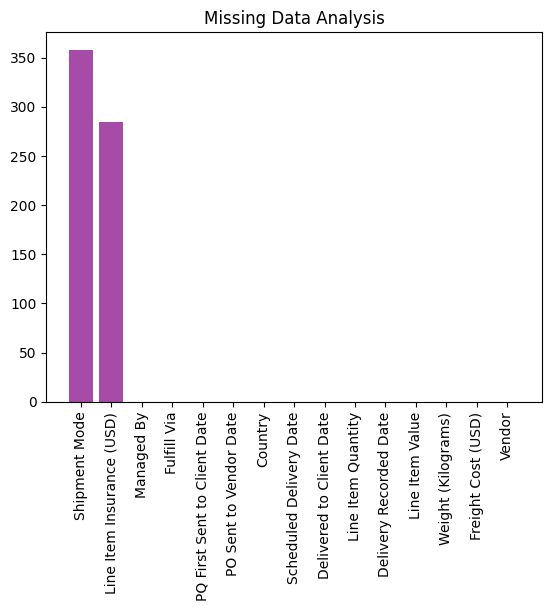

In [ ]:
missing_data = data.isnull().sum().sort_values(ascending=False)
plt.bar(missing_data.index, missing_data.values, color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.title("Missing Data Analysis")
plt.show()

In [ ]:
data.loc[:, 'Shipment Mode'] = data['Shipment Mode'].fillna(data['Shipment Mode'].mode()[0])
data.loc[:, 'Line Item Insurance (USD)'] = data['Line Item Insurance (USD)'].fillna(0)
data

,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Vendor,Line Item Insurance (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,19,551.00,13,780.34,RANBAXY Fine Chemicals LTD.,0.00
1,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,1000,6200.00,358,4521.5,Aurobindo Pharma Limited,0.00
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,500,40000.00,171,1653.78,Abbott GmbH & Co. KG,0.00
3,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,31920,127360.80,1855,16007.06,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,0.00
4,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,38000,121600.00,7590,45450.08,Aurobindo Pharma Limited,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,166571,599655.60,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),SCMS from RDC,705.79
10320,Côte d'Ivoire,PMO - US,From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,21072,137389.44,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),SCMS from RDC,161.71
10321,Zambia,PMO - US,From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,514526,5140114.74,Weight Captured Separately,Freight Included in Commodity Cost,SCMS from RDC,5284.04
10322,Zimbabwe,PMO - US,From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,17465,113871.80,1392,Freight Included in Commodity Cost,SCMS from RDC,134.03


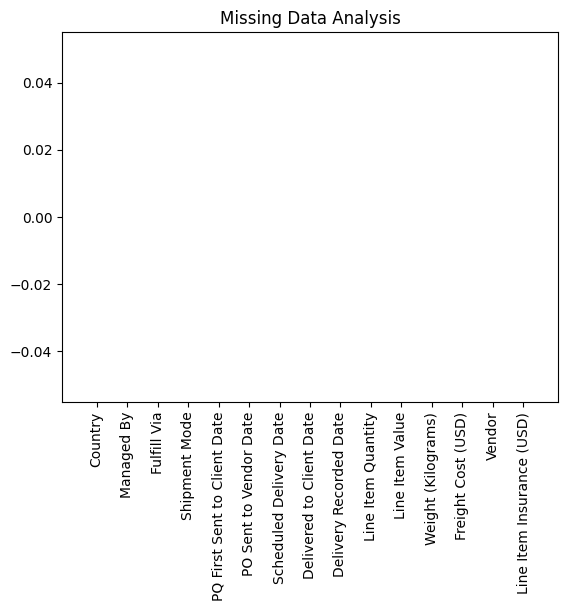

In [ ]:
missing_data = data.isnull().sum().sort_values(ascending=False)
plt.bar(missing_data.index, missing_data.values, color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.title("Missing Data Analysis")
plt.show()

In [ ]:
data = data.copy()
date_cols = data.columns[data.columns.str.contains('Date')]
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce', format='%Y-%m-%d')

num_cols = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']  # here i converted a numeric column.
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

data['Country'] = data['Country'].str.strip().str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10266 entries, 0 to 10323
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Country                       10266 non-null  object        
 1   Managed By                    10266 non-null  object        
 2   Fulfill Via                   10266 non-null  object        
 3   Shipment Mode                 10266 non-null  object        
 4   PQ First Sent to Client Date  7597 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        4547 non-null   datetime64[ns]
 6   Scheduled Delivery Date       10266 non-null  datetime64[ns]
 7   Delivered to Client Date      10266 non-null  datetime64[ns]
 8   Delivery Recorded Date        10266 non-null  datetime64[ns]
 9   Line Item Quantity            10266 non-null  int64         
 10  Line Item Value               10266 non-null  float64       
 11  Weight (Kilograms)            634

<ipython-input-31-28f668e5d3df>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Country',
<ipython-input-31-28f668e5d3df>:9: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x='Country',


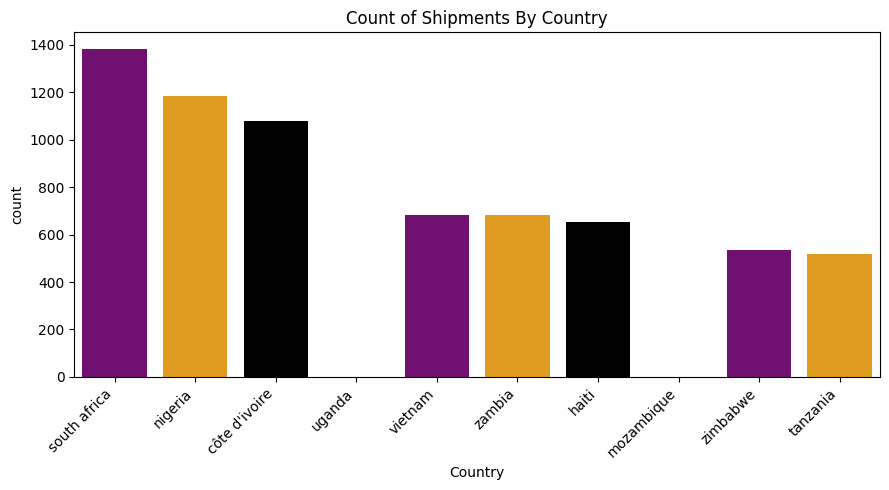

In [ ]:
# count of shipment by the respected country
palette = ['purple', 'orange', 'black', 'white']
plt.figure(figsize=(9, 5))
sns.countplot(data=data, x='Country',
              order=data['Country'].value_counts().nlargest(10).index,
              palette=palette)
plt.title('Count of Shipments By Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

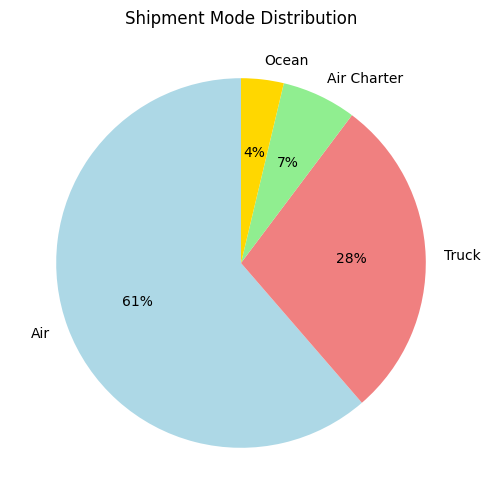

In [ ]:
# shipment mode distribution
shipment_mode_counts = data['Shipment Mode'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(shipment_mode_counts, labels=shipment_mode_counts.index, autopct='%.0f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Shipment Mode Distribution")
plt.show()

<Axes: xlabel='Freight Cost (USD)', ylabel='Count'>

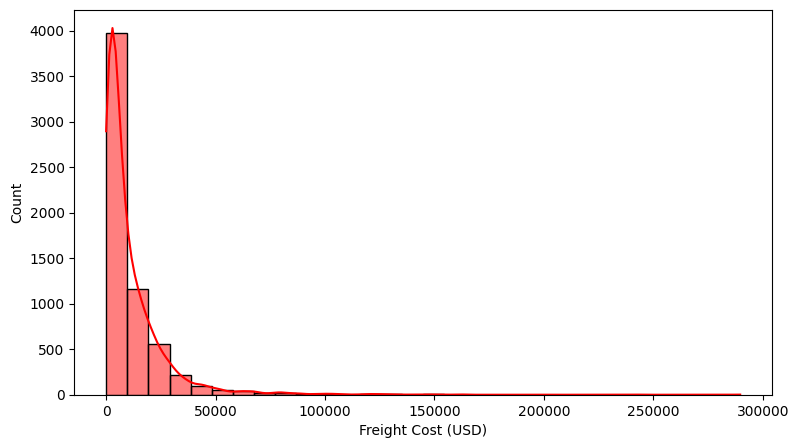

In [ ]:
# Freight cost visualisation
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
avg_freight_cost = data['Freight Cost (USD)'].mean()
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.histplot(x='Freight Cost (USD)', data=data, ax=ax, kde=True, bins=30, color= 'red')

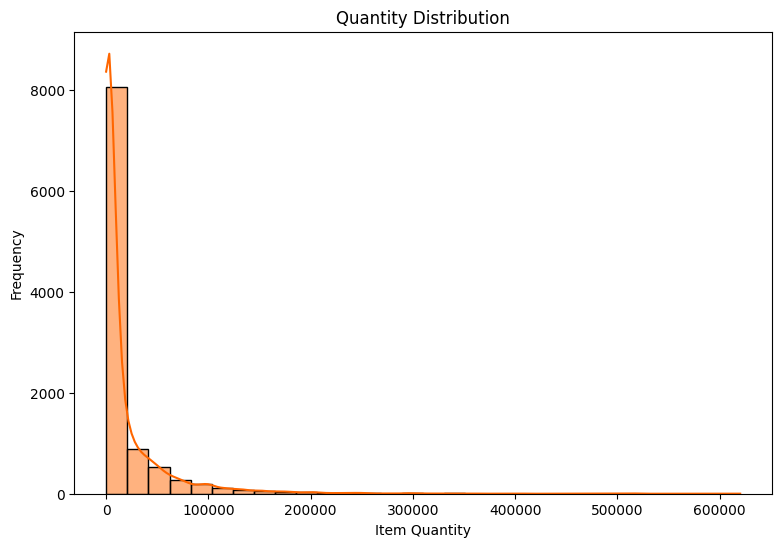

In [ ]:
# Quantity distribution
plt.figure(figsize=(9, 6))
sns.histplot(data['Line Item Quantity'], bins=30, kde=True, color='#ff6600')
plt.xlabel("Item Quantity")
plt.ylabel("Frequency")
plt.title("Quantity Distribution")
plt.show()

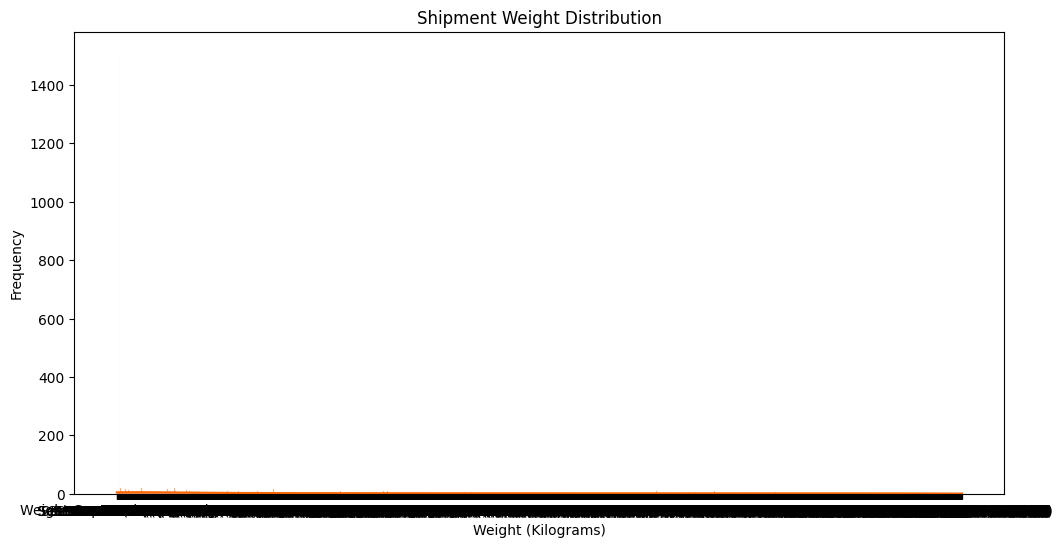

In [ ]:
# shipment weight distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Weight (Kilograms)'], bins=30, kde=True, color='#ff6600')
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Frequency")
plt.title("Shipment Weight Distribution")
plt.show()

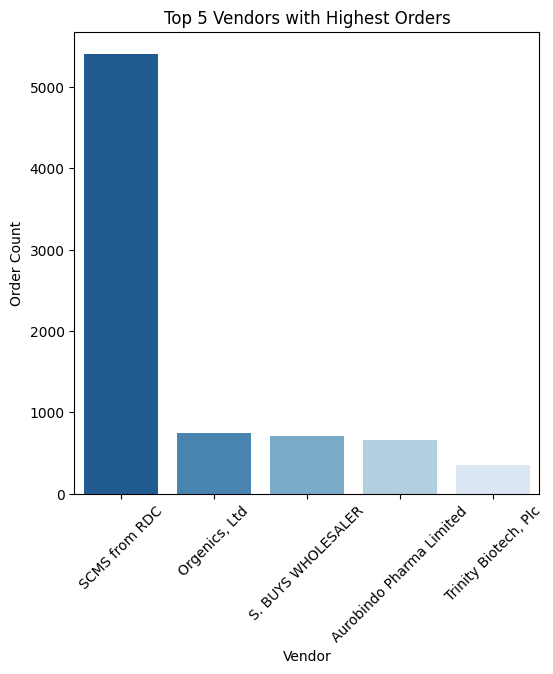

In [ ]:
# bar chart for top 5 vendors
plt.figure(figsize=(6, 6))
top_vendors = data['Vendor'].value_counts().nlargest(5)
sns.barplot(x=top_vendors.index, y=top_vendors.values, hue=top_vendors.index, palette="Blues_r", legend=False)
plt.xlabel("Vendor")
plt.ylabel("Order Count")
plt.title("Top 5 Vendors with Highest Orders")
plt.xticks(rotation=45)
plt.show()

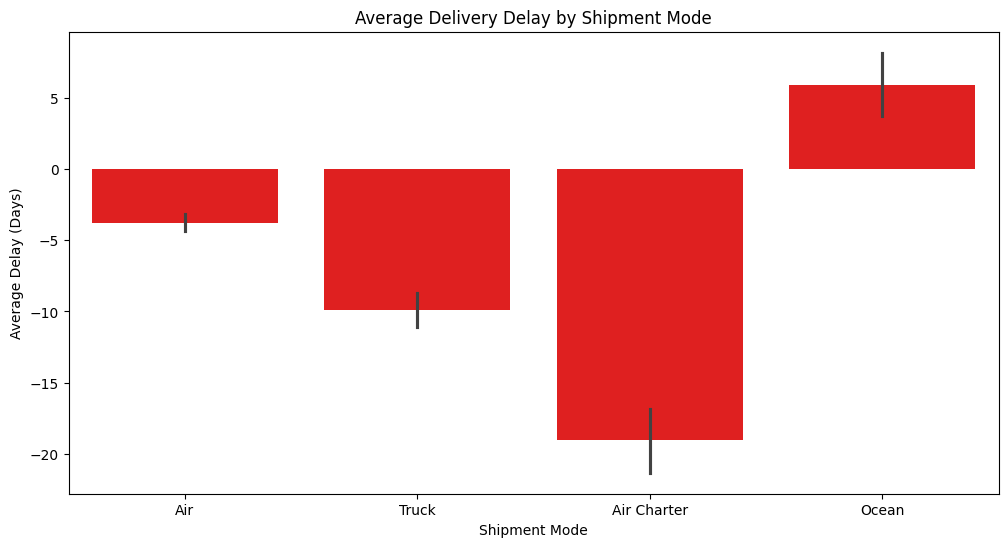

In [ ]:
# Avarage dilivery delay by shipment mode
data['Delay_Days'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipment Mode', y='Delay_Days', data=data, color='red')
plt.xlabel("Shipment Mode")
plt.ylabel("Average Delay (Days)")
plt.title("Average Delivery Delay by Shipment Mode")
plt.show()

<ipython-input-44-22dddb60989a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['PQ First Sent to Client Date'] = pd.to_datetime(data['PQ First Sent to Client Date'], errors='coerce')
<ipython-input-44-22dddb60989a>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shipments = data.set_index('Shipment_Date').resample('M').size()


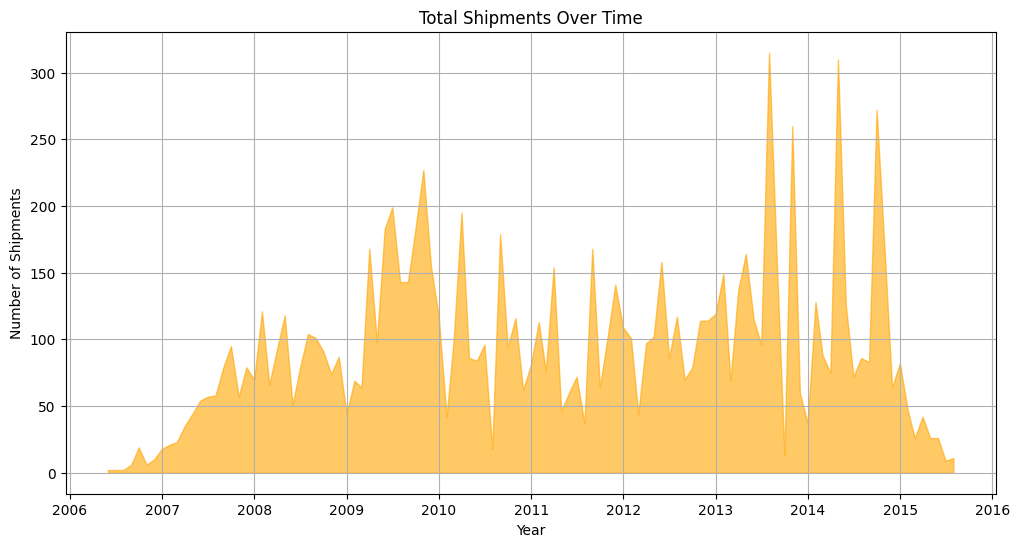

In [ ]:
# total shipment over time
data['PQ First Sent to Client Date'] = pd.to_datetime(data['PQ First Sent to Client Date'], errors='coerce')
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'], errors='coerce')

# here i filled the missing dates with Scheduled Delivery Date and  in next line of code i drop rows where Shipment_Date is still NaT.
data['Shipment_Date'] = data['PQ First Sent to Client Date'].fillna(data['Scheduled Delivery Date'])
data = data.dropna(subset=['Shipment_Date'])
shipments = data.set_index('Shipment_Date').resample('M').size()
plt.figure(figsize=(12, 6))
plt.fill_between(shipments.index, shipments.values, color='orange', alpha=0.6)
plt.title("Total Shipments Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Shipments")
plt.grid(True)
plt.show()


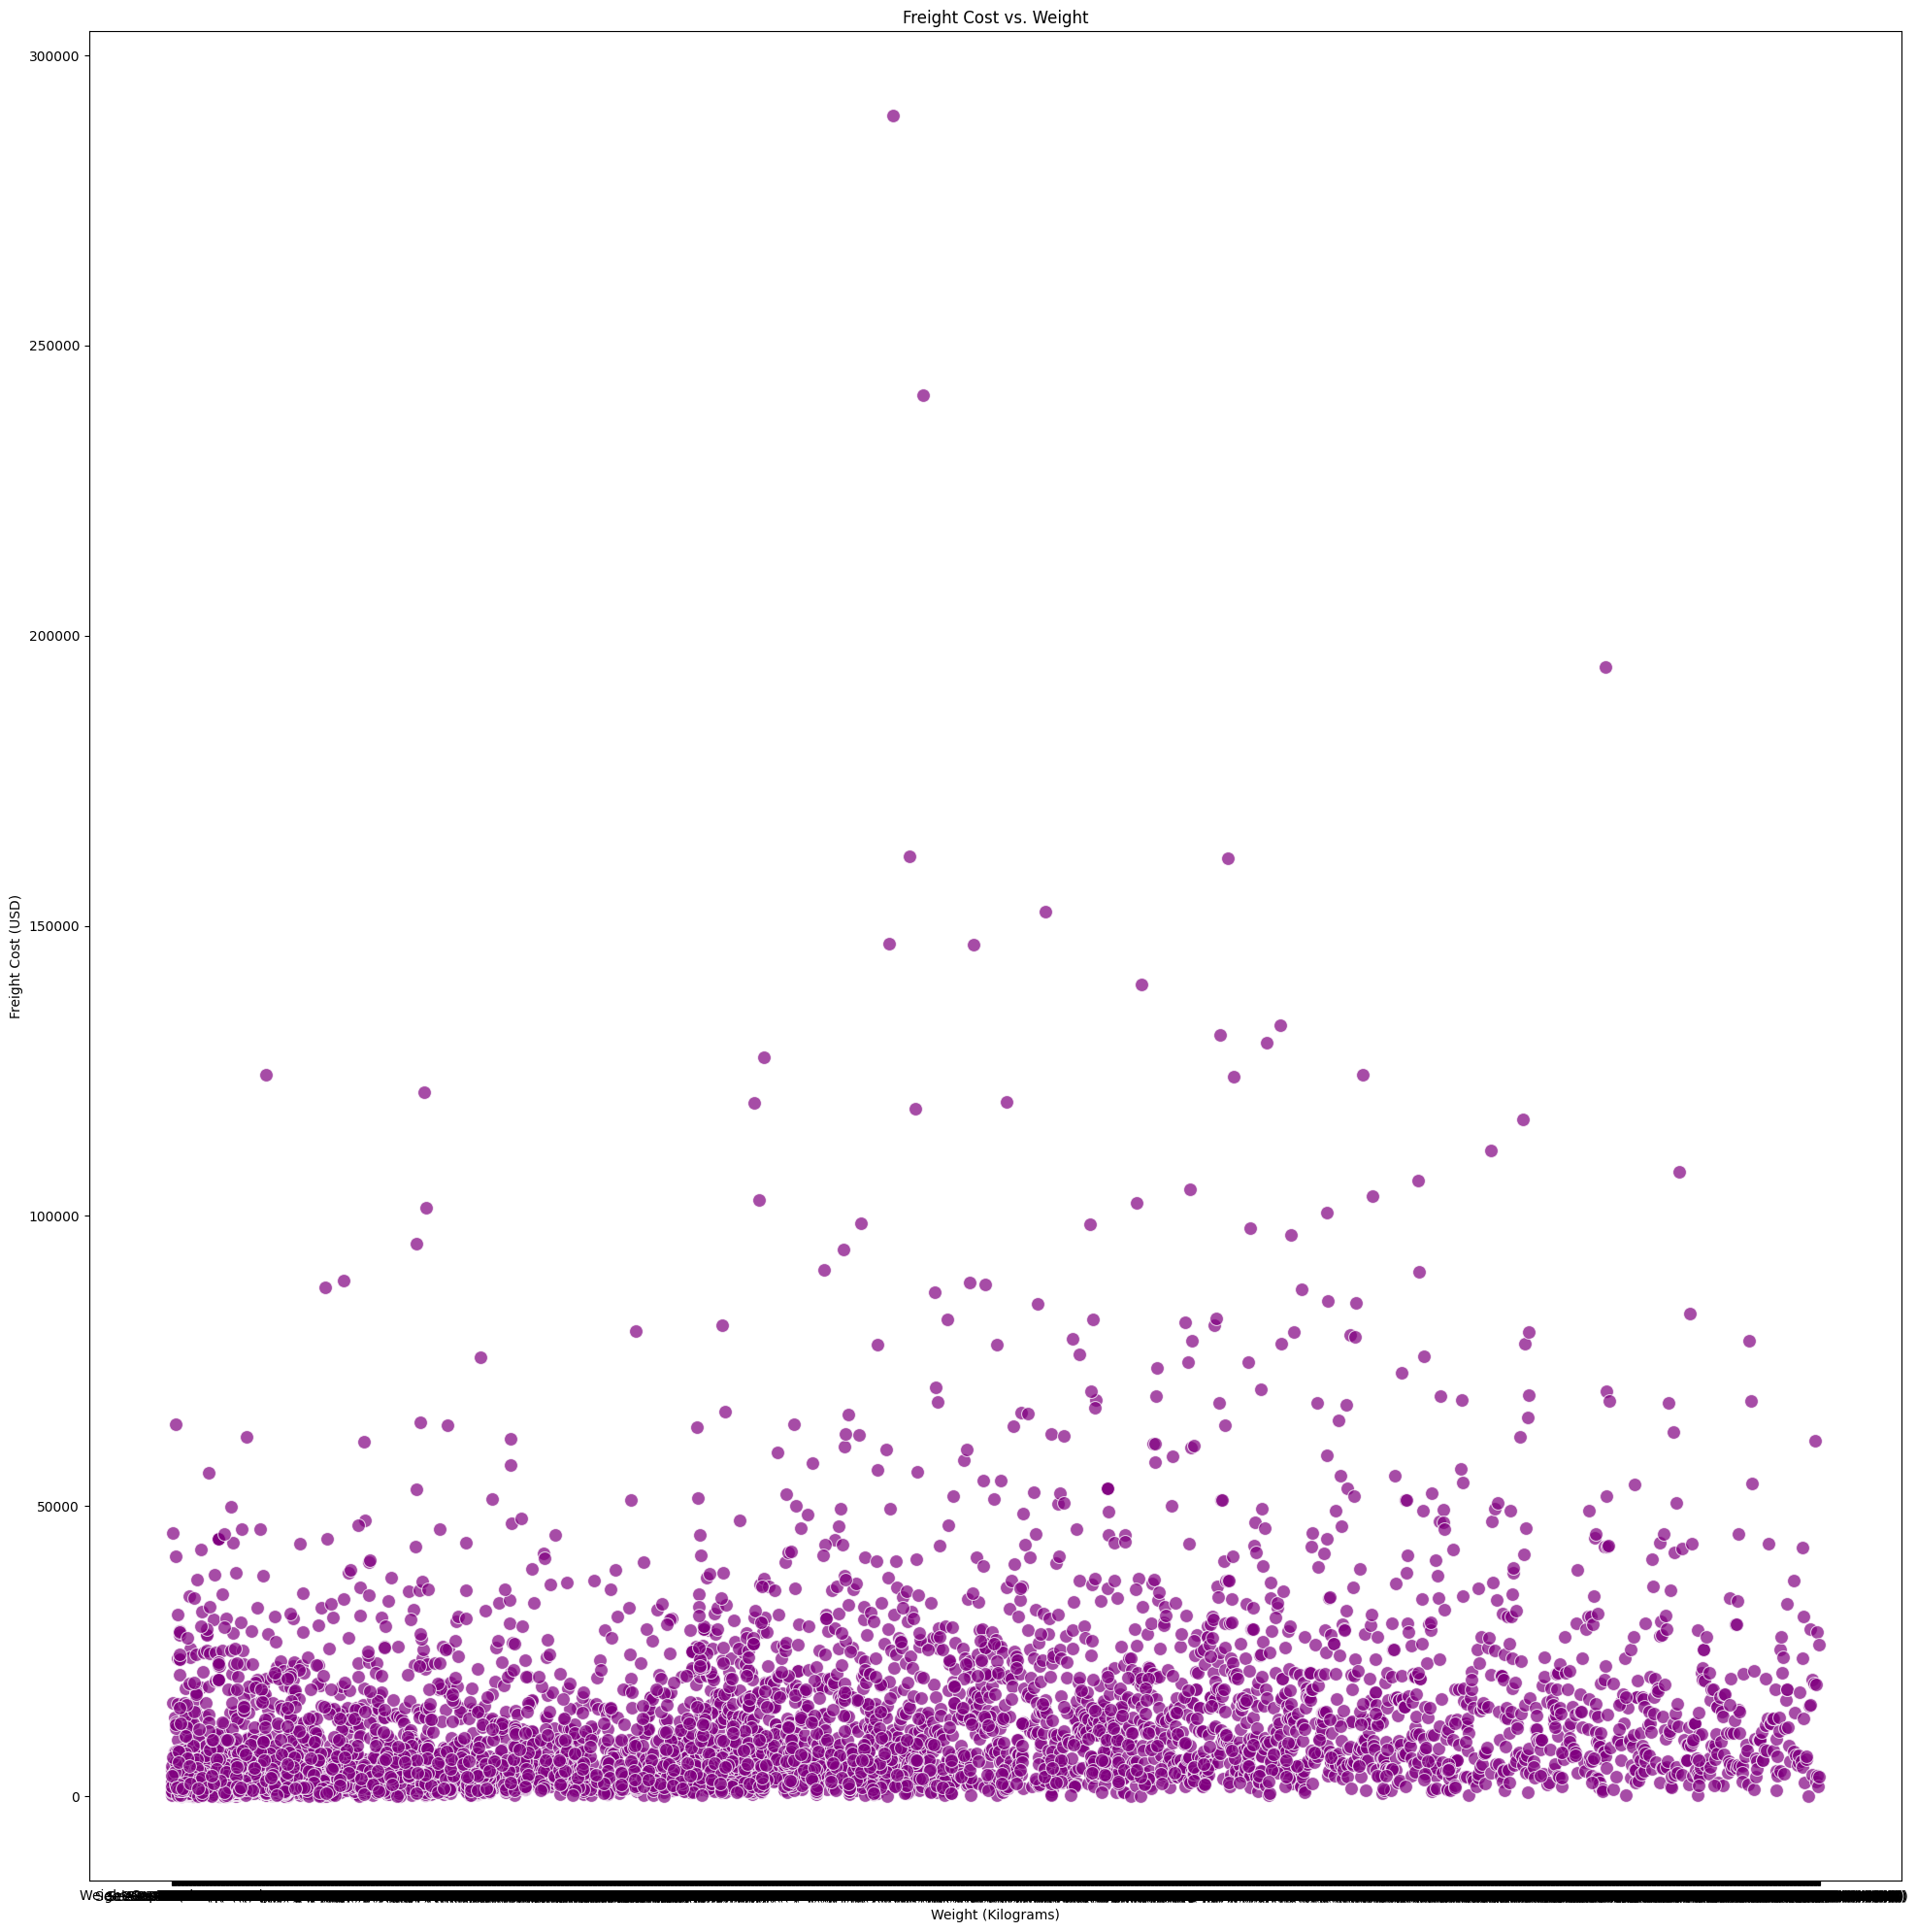

In [ ]:
# Freight Cost vs. Weight
plt.figure(figsize=(20,20))
sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', data=data, s=100, alpha=0.7, color='purple')
plt.title('Freight Cost vs. Weight')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()

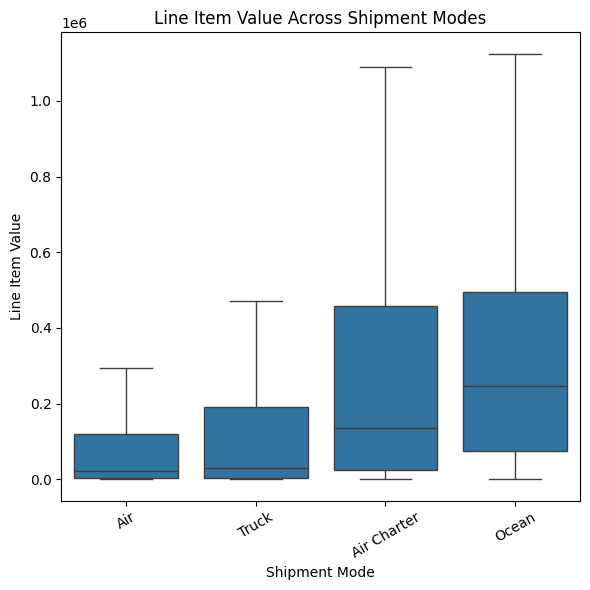

In [ ]:
# Line Item Value Across Shipment Modes
plt.figure(figsize=(6, 6))
sns.boxplot(x='Shipment Mode', y='Line Item Value', data=data, showfliers=False)
plt.title('Line Item Value Across Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Line Item Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

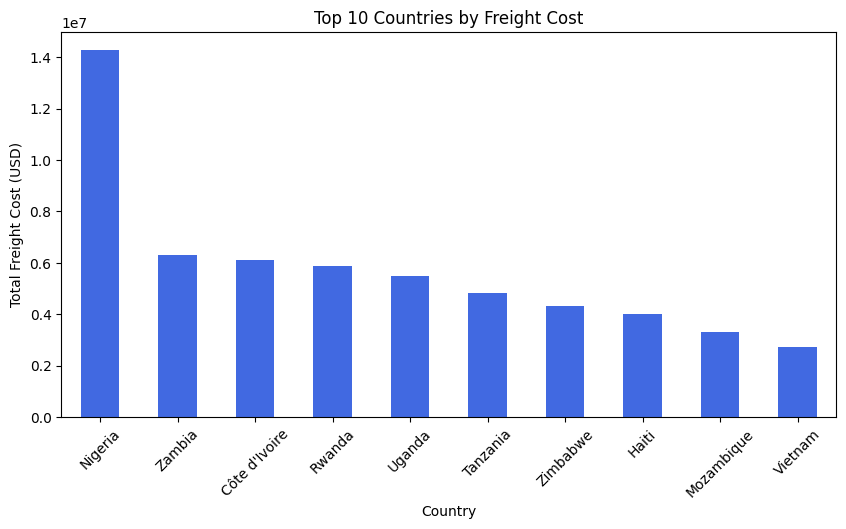

In [ ]:
# Top 10 Countries by Freight Cost
top_countries = data.groupby('Country')['Freight Cost (USD)'].sum().nlargest(10)
top_countries.plot(kind='bar', figsize=(10, 5), color='royalblue')
plt.title('Top 10 Countries by Freight Cost')
plt.ylabel('Total Freight Cost (USD)')
plt.xticks(rotation=45)
plt.show()

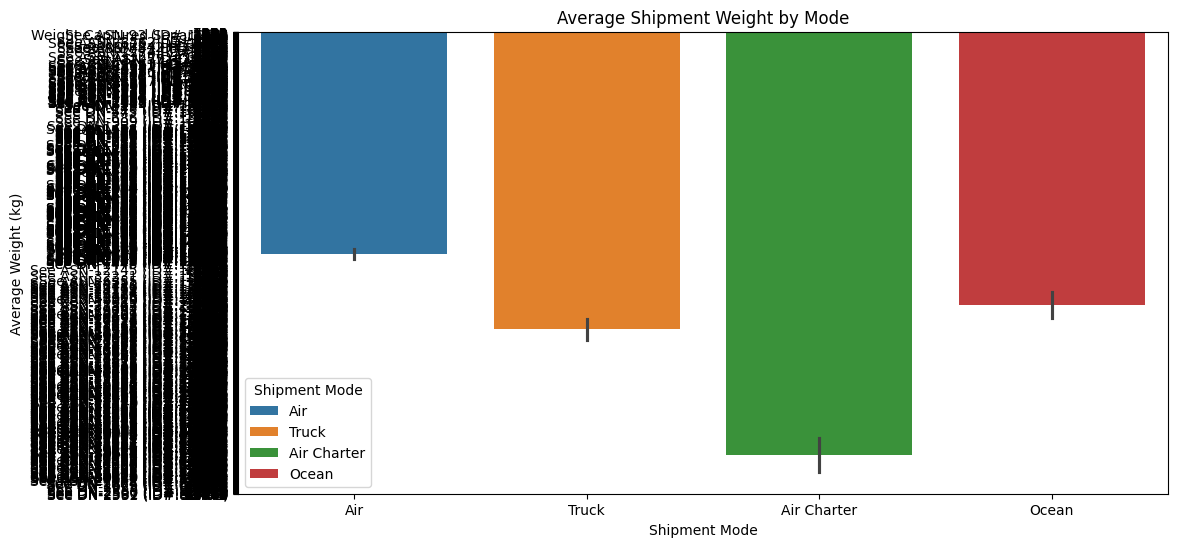

In [ ]:
# Avarage shipment weight by mode
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipment Mode', y='Weight (Kilograms)', data=data, estimator='mean', hue='Shipment Mode', dodge=False)
plt.title('Average Shipment Weight by Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Weight (kg)')
plt.show()

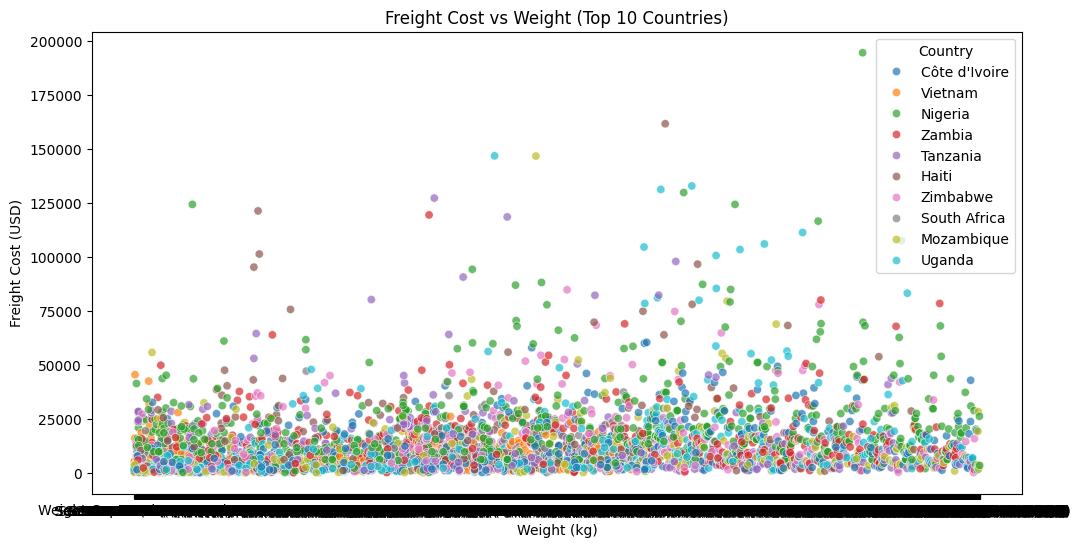

In [ ]:
# Freight Cost vs Weight (Top 10 Countries)
top_10_countries = data['Country'].value_counts().nlargest(10).index
top_10_data = data[data['Country'].isin(top_10_countries)]
plt.figure(figsize=(12, 6))
sns.scatterplot(y='Freight Cost (USD)',x='Weight (Kilograms)', hue='Country', data=top_10_data, alpha=0.7)
plt.title('Freight Cost vs Weight (Top 10 Countries)')
plt.xlabel('Weight (kg)')
plt.ylabel('Freight Cost (USD)')
plt.show()

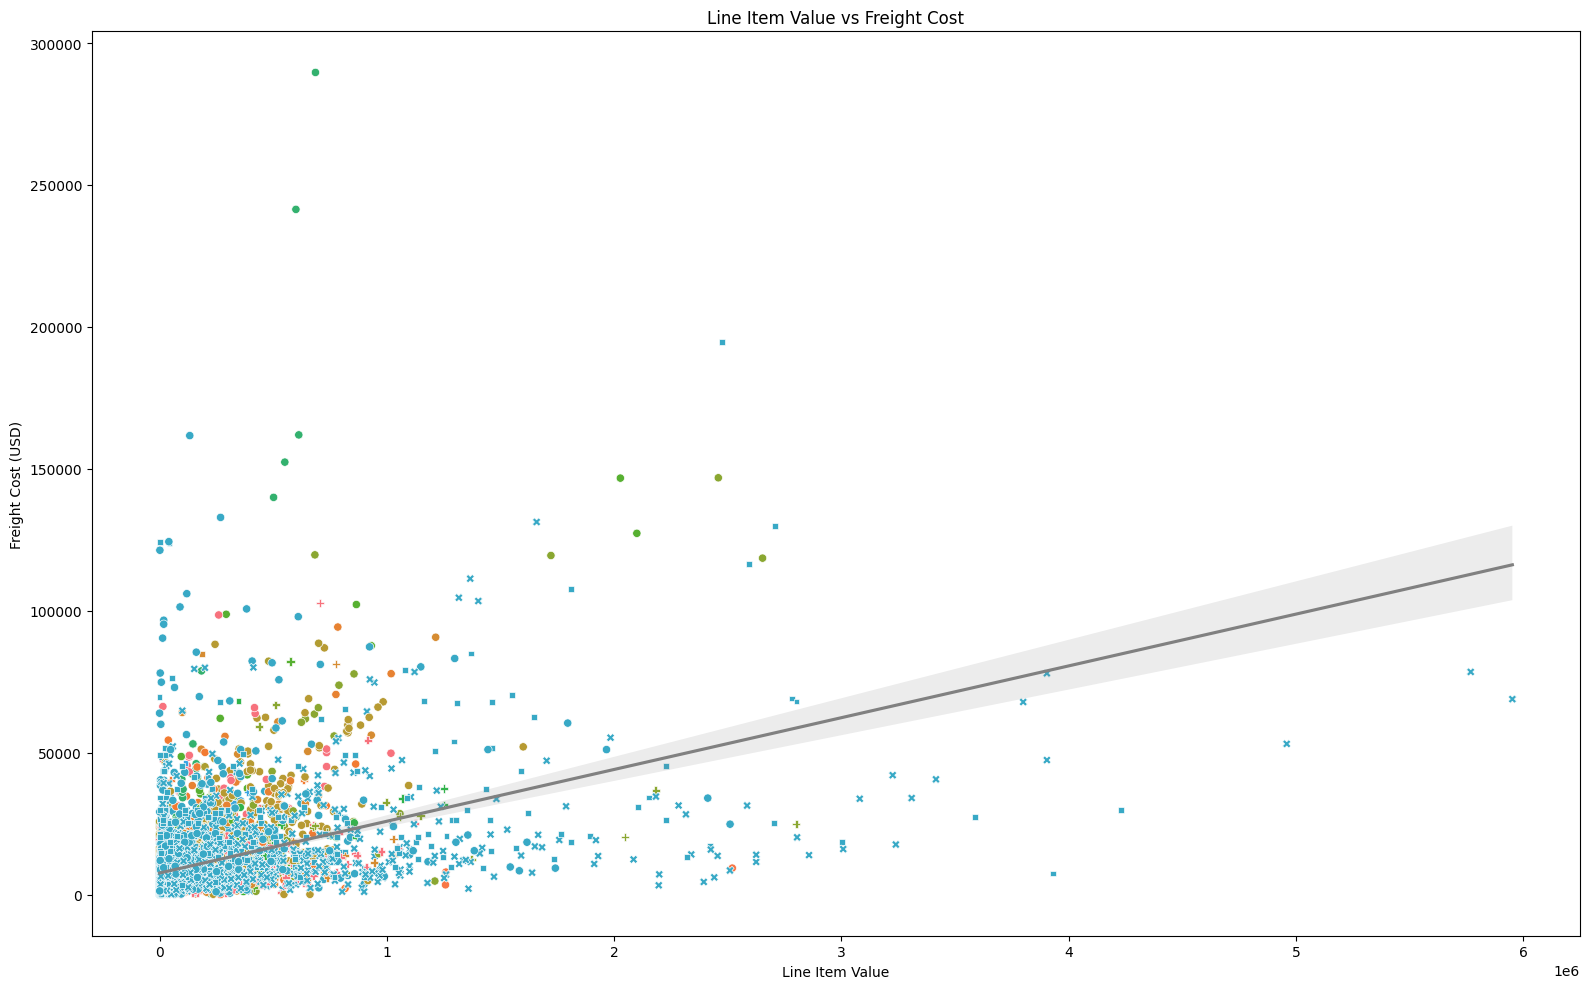

In [ ]:
# Line Item Value vs Freight Cost
fig, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(x='Line Item Value', y='Freight Cost (USD)', hue='Vendor', style='Shipment Mode', data=data, ax=ax, legend=False)
sns.regplot(x='Line Item Value', y='Freight Cost (USD)', data=data, scatter=False, ax=ax, color='gray')
ax.set_title('Line Item Value vs Freight Cost')
ax.set_xlabel('Line Item Value')
ax.set_ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()

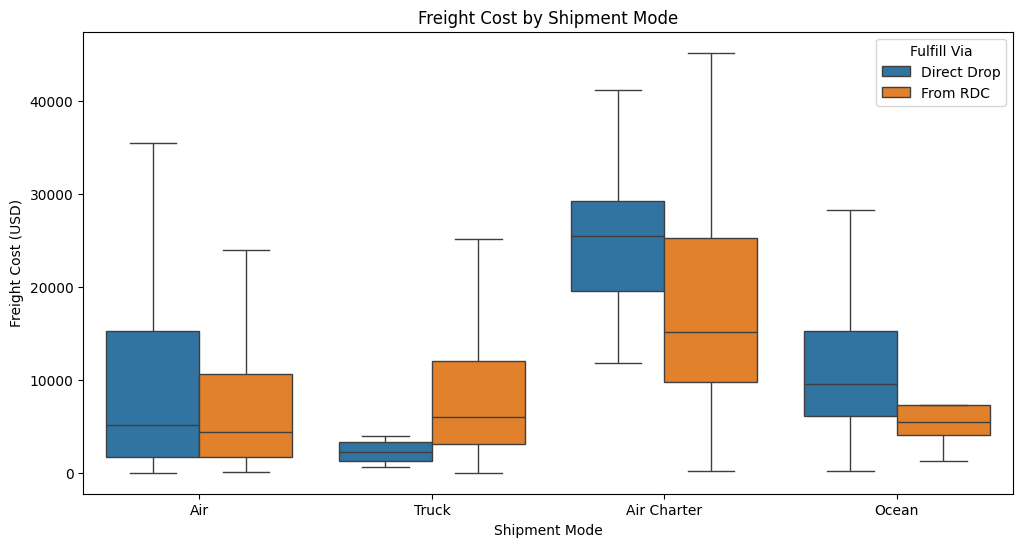

In [ ]:
# Freight Cost by Shipment Mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipment Mode', y='Freight Cost (USD)', hue='Fulfill Via', data=data, showfliers=False)
plt.title('Freight Cost by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Freight Cost (USD)')
plt.show()

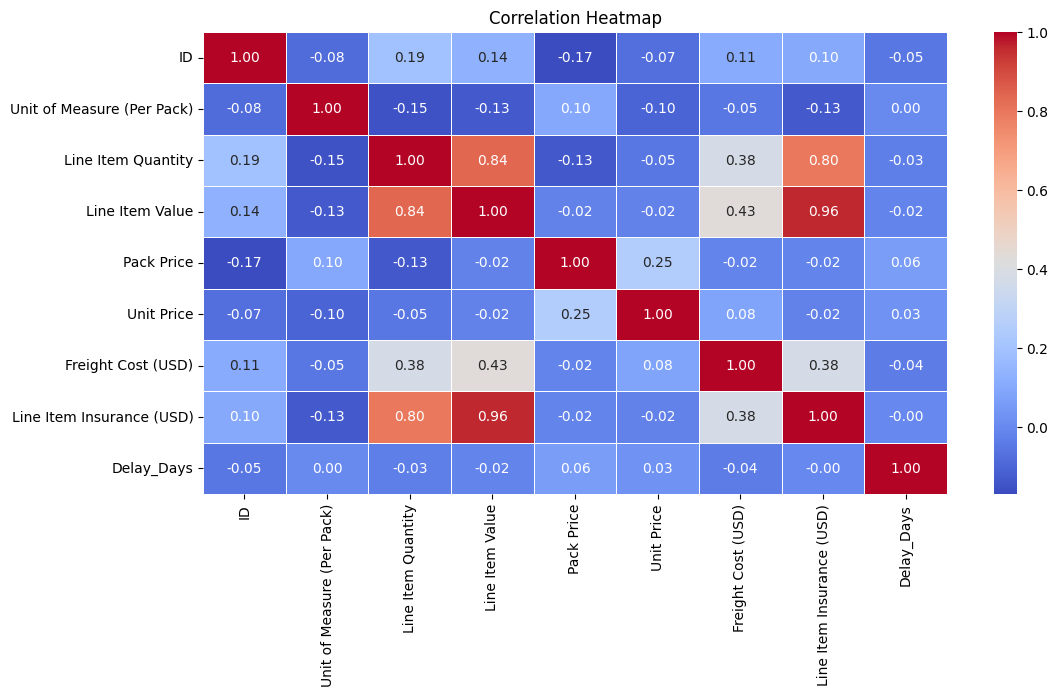

In [ ]:
# heatmap
numeric_columns = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

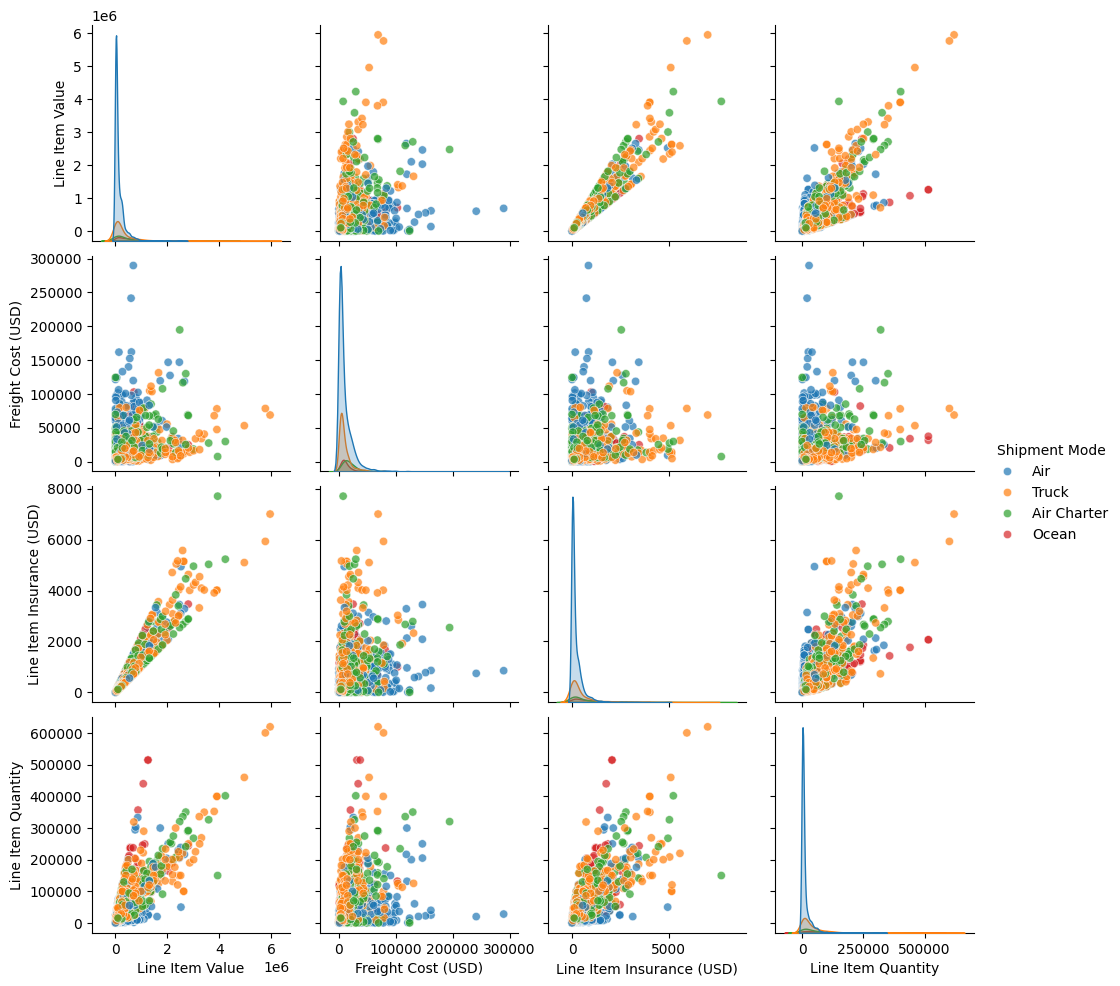

In [ ]:
df_pairplot = data[['Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)',
                      'Line Item Insurance (USD)', 'Line Item Quantity', 'Shipment Mode']].dropna()
sns.pairplot(df_pairplot, hue='Shipment Mode', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

1) What are you able to learn from the analysis?
> From the analysis, i can identify key factors affecting FedEx's shipment performance, including:

>Whether specific teams manage shipments more efficiently.

>How different shipment modes impact on-time delivery rates.

>Which countries contribute more to shipment delays.

>Whether shipment weight influences insurance costs.

>The effect of INCO terms on vendor delivery performance.

>The relationship between purchase order processing time and delivery delays.

>These insights help in optimizing logistics, reducing delays, and improving efficiency.

2) Did your assumptions turn out to be right?

> It might be a sign of best practices that other teams can follow if shipments handled by particular teams perform better.

> The business should think about giving air freight priority for urgent orders if air shipments have a noticeably higher on-time delivery rate.

> FedEx may need to examine vendor relationships, customs procedures, or route optimizations if delays are common in some nations.

> Stakeholders may think about other packaging techniques or better load distribution if heavier shipments result in higher insurance premiums.


3. How would your analysis be helpful to the stakeholders?

> Operational Teams: Able to minimize bottlenecks, optimize delivery routes, and enhance shipment management using analytics.

> Supply chain managers are able to choose vendors, shippers' preferred methods, and logistics plans based on data.

> Risk and finance teams are better able to forecast insurance premiums and make appropriate budgetary plans.

> Clients and Customers: Will gain from more consistent delivery schedules, which will increase client satisfaction.



Conclusion:  
This project offers a systematic method for analyzing FedEx shipment data and deriving valuable insights. The results can be utilized by stakeholders to improve supply chain efficiency and boost customer satisfaction.